# Project 2 : Titanic
---

#### Group : 8

#### By : Mohammed Al-Ali , Rawan MohammedEid , Ibrahim Alzahrani

<br>

### Problem statement

So Kaggle recently hosted an open online competition where the competitors had to design a model based on given training data set which predicted the survival of passengers during the famous Titanic shipwreck. And we will attempt this problem using Machine Learning basic concepts of algorithms (Classification) and data processing.

### Excutive summary

When There was some element of luck involved in surviving such as the cabin and gender and so on, it seems some groups of people were more likely to survive than others. And  by using five features we were able to predict the number of survived passengers.<br>
Exploratory data analysis produces the findings:
<ol>
    <li>The mean of age in pclass 3 is the smallest among the pclasses by 25.14.</li>
    <li>The percentage of male death is more than %90.</li>
    <li>The Southampton embarkation port has the highest number of survived among the ports.</li>
</ol>

### Contents:
- [Load Data](#Load-Data)
- [Data Cleaning & Exploration](#Data-Cleaning-&-Exploration)
- [Model Instantiation & Prediction](#Model-Instantiation-&-Prediction)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Load packages

In [33]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)
import warnings
warnings.filterwarnings("ignore")

## Load Data
---

In [2]:
train = pd.read_csv('../data-titanic/train.csv')
test = pd.read_csv('../data-titanic/test.csv')

<br>

## Data Cleaning & Exploration
---

#### 1. The Missing Values in Train Dataset

In this part, we show how many the missing values in each column of the train dataset.

In [3]:
# Show the missing values in train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2. The Missing Values in Train Dataset

In this part, we show how many the missing values in each column of the test dataset.

In [4]:
# Show the missing values in test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 3. Visualize The Missing Values

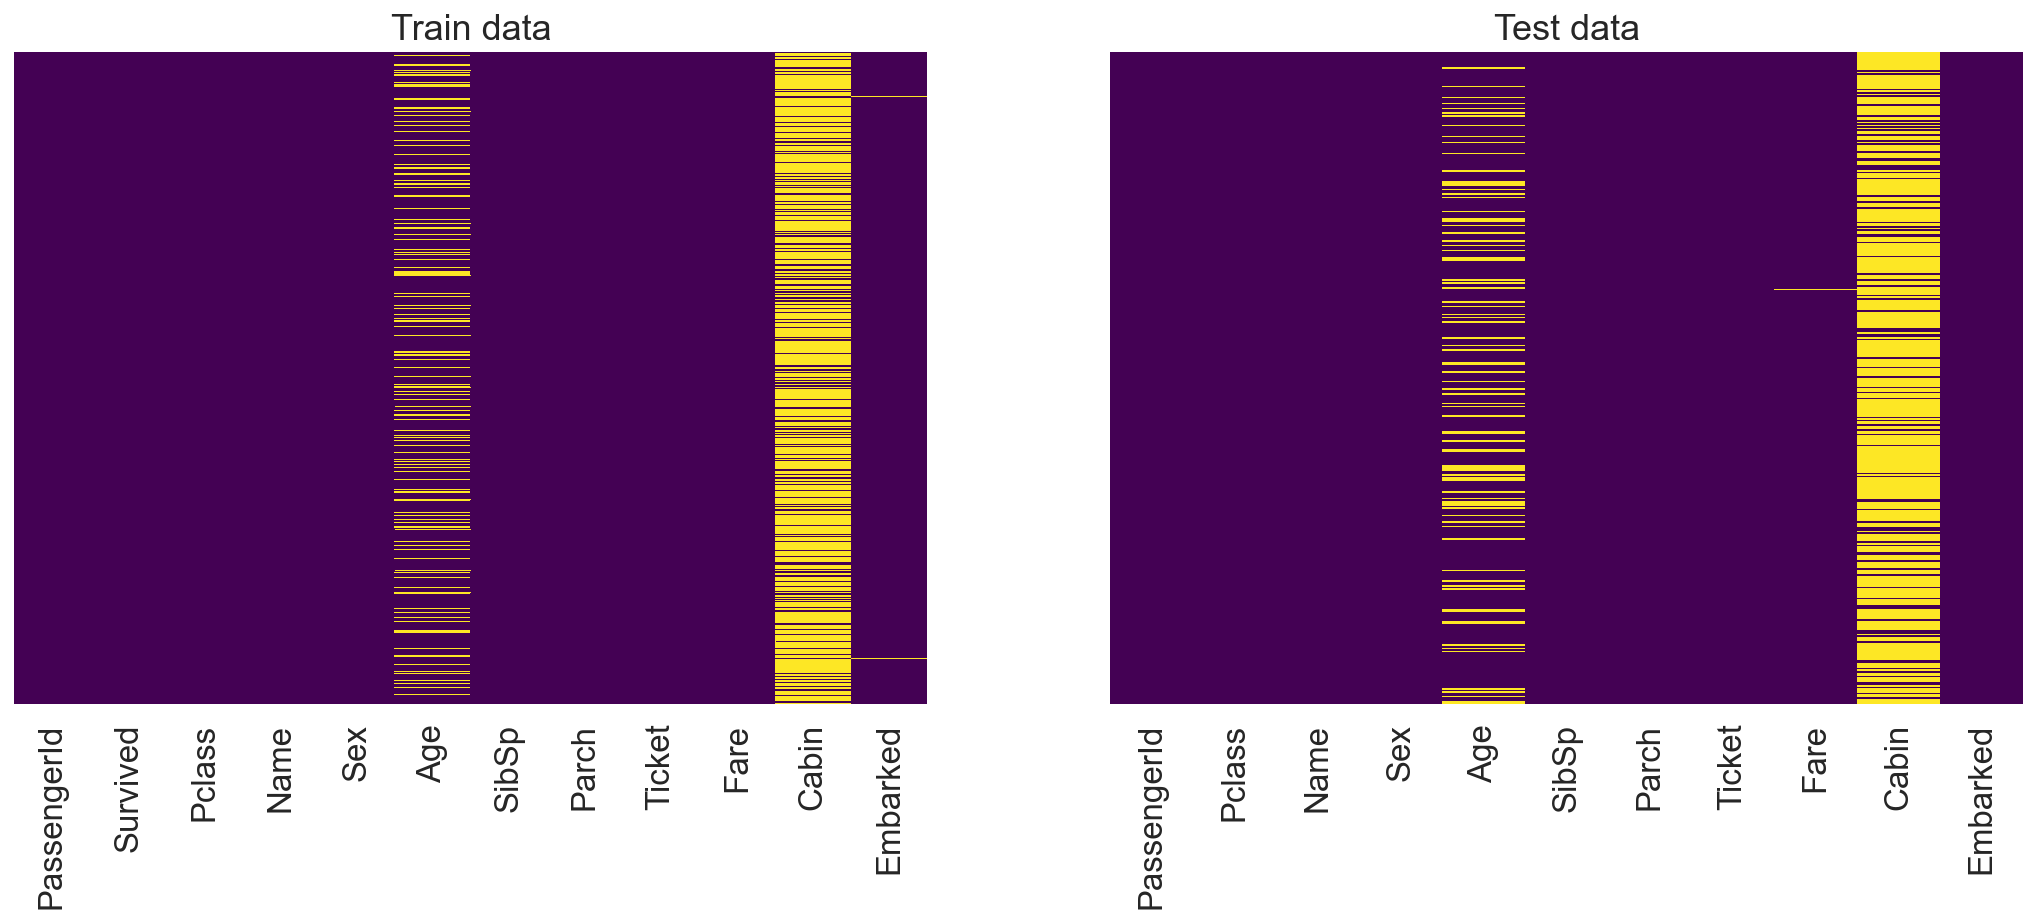

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# Train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# Test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

#### 4. Fill The Missing Values in Train dataset

In [8]:
# Show which is the most frequent value in Embarked
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# Fill missing values by the most frequent value
train = train.replace({
    'Embarked' : {np.nan : 'S'}})

#### 5. Fill The Missing Values in Test dataset

In [10]:
# Get information about columns of test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### 5.a Fill The Missing Values in Fare

In [11]:
# Show records of the missing values in Fare of test dataset
test[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [12]:
# Define the variable that contains the records of Pclass 3 
pclass_3_rows = test[test['Pclass']==3]

# Calculate the mean of Fear for pclass 3
mean = np.mean(pclass_3_rows['Fare'])
mean

12.459677880184334

In [13]:
# Fill the missing values of Fare by the mean of pclass 3
test = test.replace({
    'Fare' : {np.nan : mean}})

In [14]:
# Show the left missing values in test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

#### 6. Fill The Missing Values of Age in Both datasets

In [15]:
# Group data by pclass and calculate the mean of age per class
mean_age =train.groupby('Pclass').agg({'Age': 'mean'})
mean_age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [16]:
# Function to impute age
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [17]:
# Replace for Train data in Pclass
# (for train) grab age and apply the impute_age, our custom function 
for i, row in train.iterrows():
    # Get the values of pclass in train dataset
    pclass_train = row['Pclass']
    
    # Get the values of Age in train dataset
    age_train = row['Age']
    
    # Combine the values of age and pclass in the list
    age_pclass = [age_train,pclass_train]
    
    # Replace the missing values in age by impute_age function
    train = train.replace({
    'Age' : {np.nan : impute_age(age_pclass)}})
    
# Replace for Test data in Pclass
# (for test) grab age and apply the impute_age, our custom function 
for index, rows in test.iterrows():
    # Get the values of pclass in train dataset
    pclass_test = rows['Pclass']
    
    # Get the values of Age in train dataset
    age_test = rows['Age']
    
    # Combine the values of age and pclass in the list
    age_pclass_test = [age_test, pclass_test]
    
    # Replace the missing values in age by impute_age function
    test = test.replace({
    'Age' : {np.nan : impute_age(age_pclass_test)}})


In [18]:
# Show the left missing values in train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
# Show the left missing values in test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

#### 7. Modify The Cabin Values in Both datasets

In [20]:
# If the cabin is not null then it is 1 otherwise it is 0 in both datasets
train['Cabin']=train['Cabin'].apply(lambda x:1 if pd.notnull(x) else 0)
test['Cabin']=test['Cabin'].apply(lambda x:1 if pd.notnull(x) else 0)

#### 8. Summary Statistics (train dataset)

In [21]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.169663,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.360360,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


#### 9. How is The Age distributed in Survived Class?

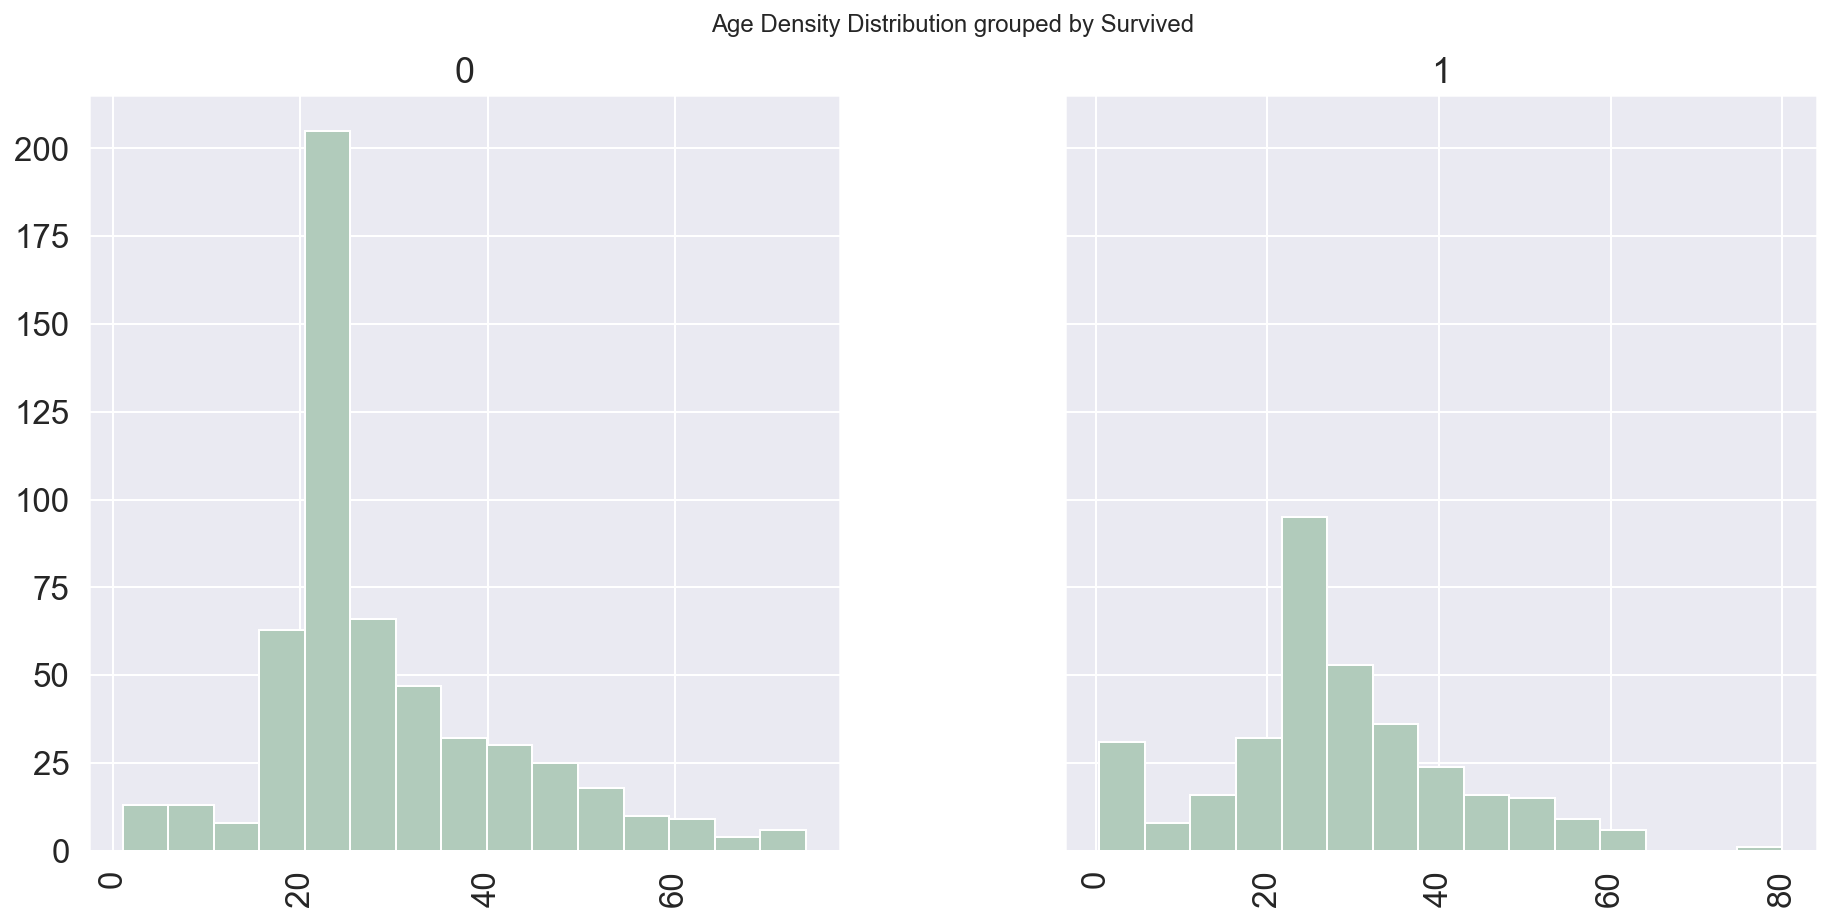

In [22]:
# Plot the histogram for age per survived class
train.hist(column="Age",by="Survived",sharey=True,figsize=(15,7), bins=15,color='#b1cbbb')

# Set centered title for the plots
plt.suptitle('Age Density Distribution grouped by Survived');

Let's investigate more in the age. 

In [323]:
train['Age'].mode()

0    22.0
dtype: float64

We observe the average age of passengers is 28 years old and the eldest passenger is 80 years old, and there might be one or more families with six children with this large number of family members did they all survived 1?

Seems the most of survived passenger between 20 to 30 and the children are younger than 10 years. Could be because of children and women the first? 

#### 10. Features Selection

**After Filling all missing values lets see the relation between the Features and our traget.**

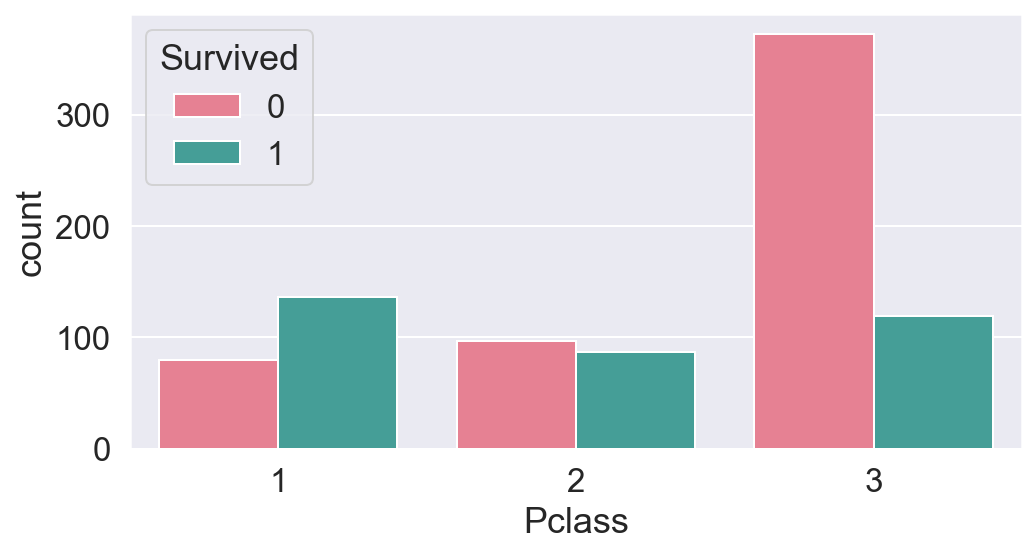

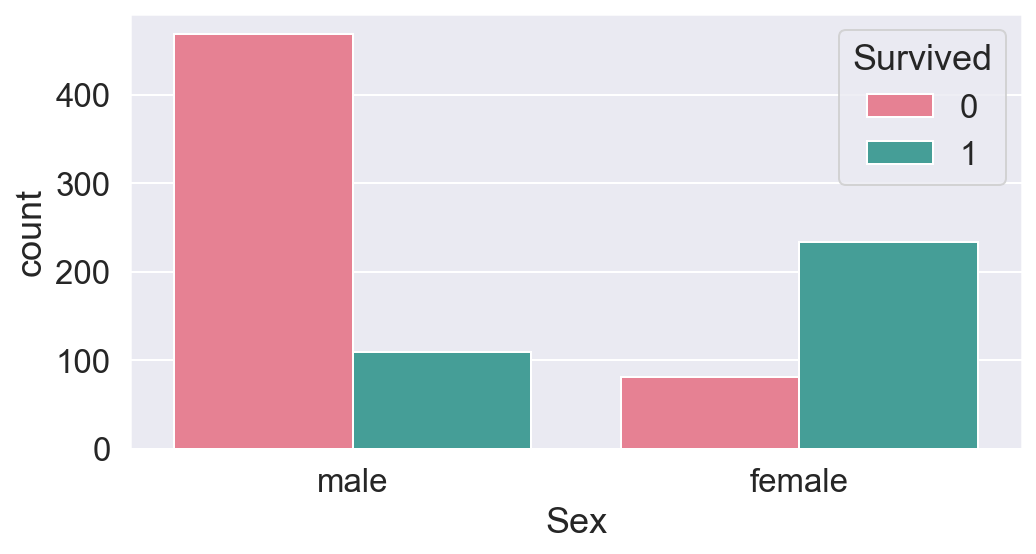

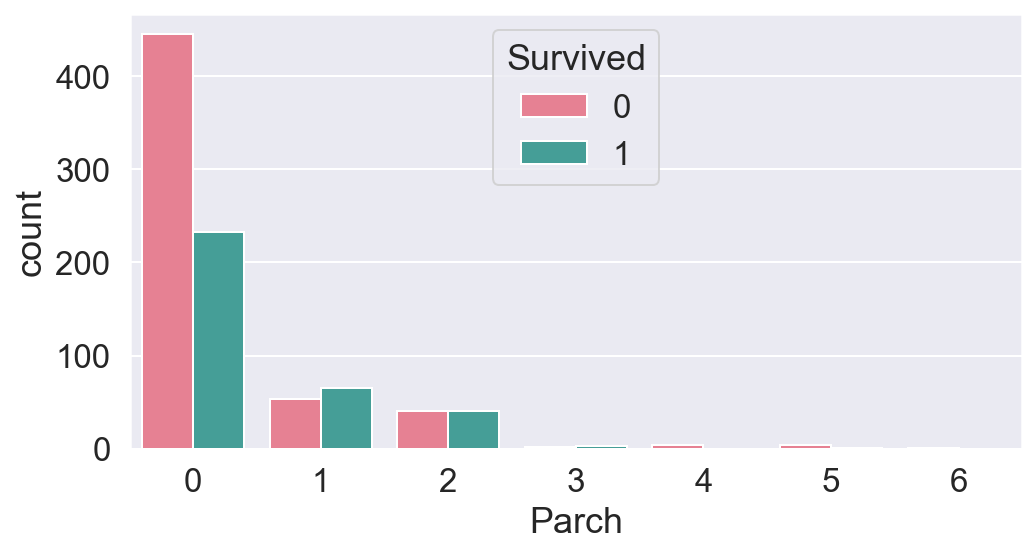

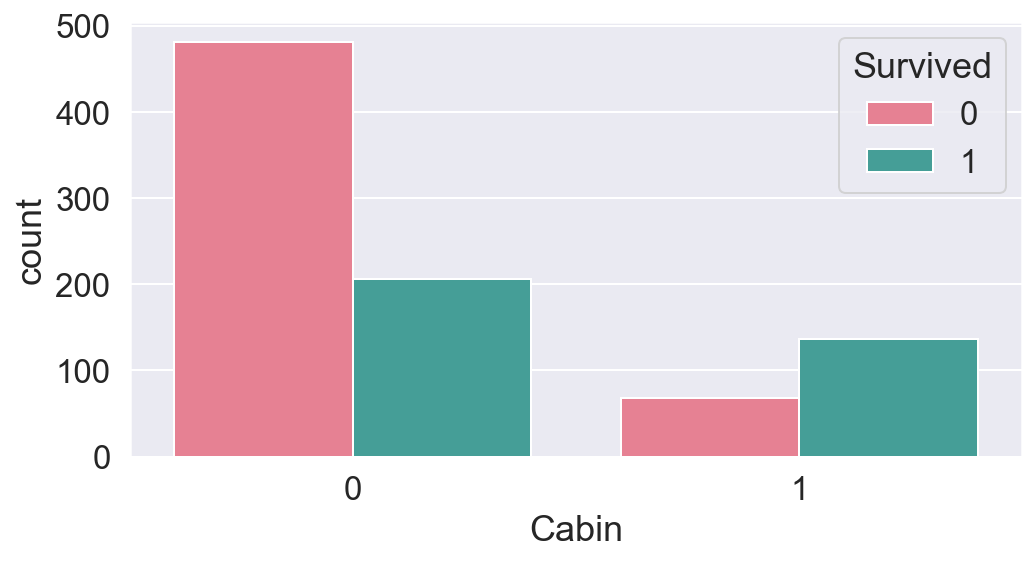

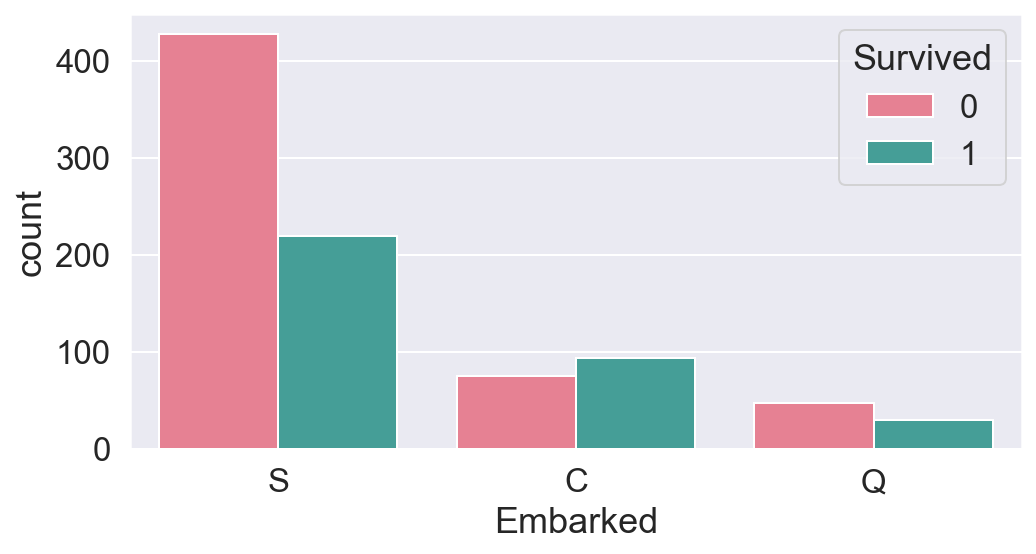

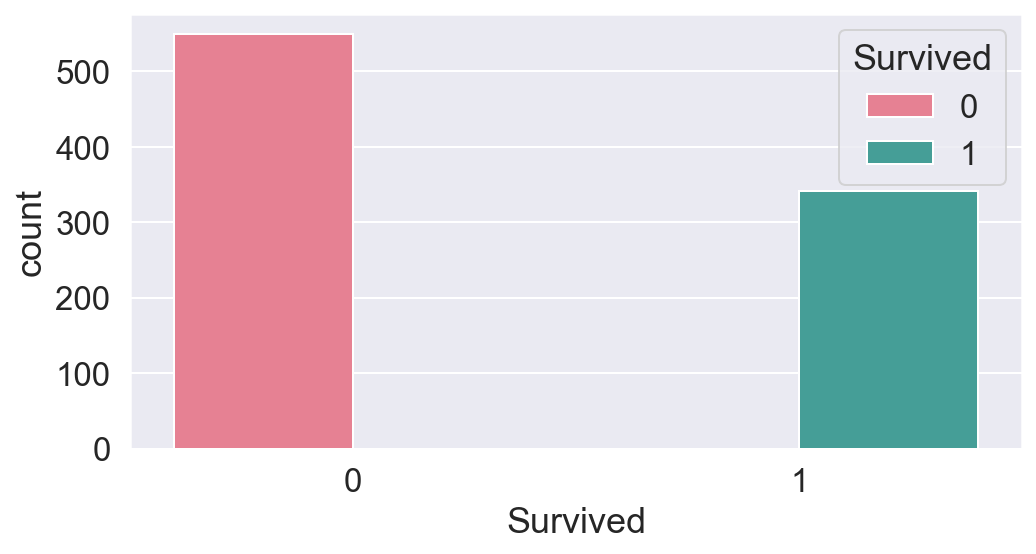

In [23]:
# Define the dataframe which contains the selected columns
df_plot = train[['Pclass','Sex','Parch','Cabin','Embarked','Survived']]

for i,column in enumerate(df_plot):
    plt.subplots(figsize = (8,4))
    ax = sns.countplot(x = df_plot[column], hue="Survived",  data = df_plot,palette="husl")
    plt.show()

**From the above graphs we can see those elemnts approve our theory which is *there are some features are related to the number of survived passenger*.**

High number of survived in :
- First class
- Female 
- 0 parent/children
- without cabin number
- Embarked S

Let's use these Features to predict, but first let us do dummy variables.

#### 11. One Hot Encoding

In [26]:
# Doing one hot encode for sex and embarked in both datasets
train_copy = pd.get_dummies(train, columns=["Sex", "Embarked"],drop_first=True)
test_copy = pd.get_dummies(test, columns=["Sex", "Embarked"],drop_first=True)

<br>

## Model Instantiation & Prediction
---

#### 1. Prepare Datasets

In [27]:
# The selected features in the list will are useless for the target
features_drop = ['PassengerId','Name', 'Ticket', 'Survived']

In [28]:
# Choose the columns which are not selected to drop it
selected_features = [column for i,column in enumerate(train_copy.columns) if column not in features_drop]
selected_features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [29]:
# Define the X_train by using the selected columns
X_train = train_copy[selected_features]

# Define the y_train or target
y_train = train_copy['Survived']

# Define the X_test by using the selected columns
X_test = test_copy[selected_features]

#### 2. Baseline Prediction (train data)

In [30]:
base = y_train.value_counts()/len(y_train)
base[0] # The most frequent strategy for baseline

0.6161616161616161

Number of death more than survived.

In [34]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,1,0
3,3,27.0,0,0,8.6625,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


#### 3. Scaled Data

In [35]:
# Do Scaling for data
scaler = StandardScaler()
Xs = scaler.fit_transform(X_train)
Xs_test= scaler.transform(X_test)

<br>Staring for here we will be comparing `best_score_` with `cross_val_score` in each model to see if it's over fit or not.

#### 4. Random Forest with Grid search

In [41]:
#tuning
grid_param ={'max_depth': np.linspace(1,10,num=10,dtype=int),
             'criterion':['gini', 'entropy'],
             'max_features': [0.6,0.8,0.9],
             'min_samples_leaf': [2,5],
             'n_estimators': [200,250,300]}

In [45]:
# Build Random Forest model 
rf = RandomForestClassifier(random_state=1)

gs_rf = GridSearchCV(rf, 
                  grid_param, 
                  cv=5,
                  scoring='accuracy',
                  verbose=1,
                  n_jobs =5)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    7.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   37.9s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  3.1min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  5.0min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  7.5min
[Parallel(n_jobs=5)]: Done 1800 out of 1800 | elapsed:  7.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.6, 0.8, 0.9],
                         'min_samples_leaf': [2, 5],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy', verbose=1)

In [48]:
# Getting the best parameters of estimator
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 0.8,
 'min_samples_leaf': 5,
 'n_estimators': 250}

In [49]:
# Getting the best cross validation of estimator
RF=gs_rf.best_score_
RF

0.8316740945326722

In [50]:
# Build RF with best parameters we've got from GridSearchCV
rf2= RandomForestClassifier(criterion= 'entropy',
                           max_depth= 7,
                           max_features= 0.8,
                           min_samples_leaf= 5,
                           n_estimators= 250,
                           random_state=1)
rf2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       min_samples_leaf=5, n_estimators=250, random_state=1)

In the cell below, use `cross_val_score` to see what accuracy we can expect from our model.

In [51]:
# Perform 5-fold cross validation
scores = cross_val_score(rf2,X_train, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.81005587 0.8258427  0.87078652 0.79775281 0.85393258]
Mean cross-validated scores: 0.8316740945326722


#### 5. K-Nearest Neighbors

Let's try the simplest KNN, since it is KNN we will use the scaled predictors (X).

##### 5.a KNN with set of K

In [52]:
# Get best K on train data
scores_lst = []
for k_ in range(1,20):
    # Build KNN regression model
    knn_test = KNeighborsClassifier(n_neighbors=k_)
    scores_lst.append((k_, np.mean(cross_val_score(knn_test, Xs, y_train, cv=5))))

In [53]:
scores_lst

[(1, 0.7430293139162638),
 (2, 0.7722051346431485),
 (3, 0.7923733601154981),
 (4, 0.7934718473416609),
 (5, 0.8002196974452325),
 (6, 0.8024543343167411),
 (7, 0.8092021844203126),
 (8, 0.8058502291130502),
 (9, 0.8069549934090766),
 (10, 0.8013307388111229),
 (11, 0.8136902893729208),
 (12, 0.8091959073504489),
 (13, 0.8080660347749671),
 (14, 0.8114305442219573),
 (15, 0.8035716527524951),
 (16, 0.805818843763731),
 (17, 0.7957253154227606),
 (18, 0.8080723118448307),
 (19, 0.8047015253279769)]

From above list we can see the best k value is 11.

In [54]:
# Build KNN regression model with best K
knn_ = KNeighborsClassifier(n_neighbors=11)
knn_.fit(Xs, y_train)

KNeighborsClassifier(n_neighbors=11)

In [55]:
knn_.score(Xs, y_train)

0.8372615039281706

In the cell below, use `cross_val_score` to see what accuracy we can expect from our KNN model.

In [56]:
# Perform 5-fold cross validation
scores = cross_val_score(knn_, Xs, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.81564246 0.79213483 0.8258427  0.79213483 0.84269663]
Mean cross-validated scores: 0.8136902893729208


There is small overfitt , let's see it with **Bagging**.

##### 5.b KNN and GridSearchCV with Bagging

In [57]:
# Build KNN regression model
knn = KNeighborsClassifier()

In [58]:
#tuning
grid={'bootstrap': [False,True],
       'max_features': [0.6,0.7,0.9],
       'max_samples': [0.6,0.7,0.9],
       'n_estimators': [100,200,250]}

In [60]:
# Apply GridSearchCV on KNN with bagging 
gs2 = GridSearchCV( BaggingClassifier(base_estimator=KNeighborsClassifier(),random_state=1), 
                  grid, 
                  cv=5,            
                  verbose=1,
                  n_jobs =5)
gs2.fit(Xs, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    7.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   54.3s
[Parallel(n_jobs=5)]: Done 270 out of 270 | elapsed:  1.4min finished


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(),
                                         random_state=1),
             n_jobs=5,
             param_grid={'bootstrap': [False, True],
                         'max_features': [0.6, 0.7, 0.9],
                         'max_samples': [0.6, 0.7, 0.9],
                         'n_estimators': [100, 200, 250]},
             verbose=1)

In [63]:
# Getting the best parameters of estimator
gs2.best_params_

{'bootstrap': False,
 'max_features': 0.7,
 'max_samples': 0.9,
 'n_estimators': 100}

In [64]:
# Getting the best cross validation of estimator
baggKNN = gs2.best_score_
baggKNN

0.8238214801330738

##### 5.c KNN Bagging with The Best Parameters

In [65]:
knn_bag = BaggingClassifier(base_estimator=knn,
                           bootstrap= False,
                           max_features= 0.7,
                           max_samples= 0.9,
                           n_estimators= 100,
                           random_state=1)

In [66]:
# Perform 5-fold cross validation
scores = cross_val_score(knn_bag, Xs, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores of Bagging:", scores.mean().round(3))

Cross-validated scores: [0.79888268 0.80337079 0.85393258 0.81460674 0.84831461]
Mean cross-validated scores of Bagging: 0.824


There is also overfitting.

#### 6. Decision Tree

##### 6.a Decision Tree with Bagging and GridSearchCV

In [67]:
#tuning
gs3 = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=1), 
                  grid, 
                  cv=5,                  
                  verbose=1,
                  n_jobs =5)

gs3.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    7.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   39.0s
[Parallel(n_jobs=5)]: Done 270 out of 270 | elapsed:   46.1s finished


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         random_state=1),
             n_jobs=5,
             param_grid={'bootstrap': [False, True],
                         'max_features': [0.6, 0.7, 0.9],
                         'max_samples': [0.6, 0.7, 0.9],
                         'n_estimators': [100, 200, 250]},
             verbose=1)

In [70]:
# Getting the best cross validation of estimator
baggDT=gs3.best_score_
baggDT

0.8316929257422636

In [72]:
gs3.best_params_

{'bootstrap': False,
 'max_features': 0.7,
 'max_samples': 0.7,
 'n_estimators': 200}

##### 6.b Decision Tree with The Best Parameters of Bagging

In [73]:
dt = DecisionTreeClassifier()
dt_bagging = BaggingClassifier(base_estimator=dt,
                          bootstrap= False,
                          max_features= 0.7,
                          max_samples= 0.7,
                          n_estimators= 200,
                          random_state=1) # we can use  'max_features': [0.6, 0.8, 1],'max_samples': [1, 0.5, 0.7, 0.8]                     

In the cell below, we use `cross_val_score` to see what accuracy we can expect from our model.

In [74]:
# Perform 5-fold cross validation
scores = cross_val_score(dt_bagging,X_train, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.79329609 0.80898876 0.88202247 0.81460674 0.85955056]
Mean cross-validated scores: 0.8316929257422636


#### 7. Logistic Regression

In [75]:
logreg = LogisticRegression(penalty='l2')

logreg.fit(Xs, y_train)

LogisticRegression()

In the cell below, use `cross_val_score` to see what accuracy we can expect from our model.

In [114]:
# Perform 5-fold cross validation
scores = cross_val_score(logreg,Xs, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())
log = scores.mean()

Cross-validated scores: [0.79888268 0.78089888 0.78651685 0.7752809  0.81460674]
Mean cross-validated scores: 0.7912372104701525


#### 8. Gradient Boosting Classifier

##### 8.a Gradient Boosting with GridSearchCV

In [101]:
gbc = GradientBoostingClassifier()
param_grid = {
    'learning_rate': np.linspace(0.05,0.1,5),
    'subsample'    : np.linspace(0.5,1.,5),
    'n_estimators' : np.linspace(50,200,4,dtype=int),
    'max_depth'    : np.linspace(3,6,4,dtype=int)
}
gs_gbc = GridSearchCV(gbc,
                  param_grid, 
                  cv=5,
                  scoring='accuracy',
                  verbose=1,
                 n_jobs=5)
gs_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 1418 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1968 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.05  , 0.0625, 0.075 , 0.0875, 0.1   ]),
                         'max_depth': array([3, 4, 5, 6]),
                         'n_estimators': array([ 50, 100, 150, 200]),
                         'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
             scoring='accuracy', verbose=1)

In [104]:
# Getting the best cross validation of estimator
gbcs= gs_gbc.best_score_
gbcs

0.8428912183792606

In [105]:
# Getting the best parameters of estimator
gs_gbc.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.875}

##### 8.b Gradient Boosting with Its Best Parameters

In [106]:
#model with best params
gbc_cv = GradientBoostingClassifier(learning_rate= 0.1,
                                    max_depth= 4,
                                    n_estimators= 200,
                                    subsample= 0.875
                                   )
gbc_cv.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=200, subsample=0.875)

In the cell below, use `cross_val_score` to see what accuracy we can expect from our model.

In [108]:
# Perform 5-fold cross validation
scores = cross_val_score(gbc_cv,X_train, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.83798883 0.8258427  0.85393258 0.81460674 0.84269663]
Mean cross-validated scores: 0.8350134957002071


#### 9. ExtraTree Classifier

##### ExtraTree Classifier with GridSearchCV

In [109]:
param_grid={ 'max_depth': [10,30,40,50],
        'n_estimators': [100,200,250],
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
           }

In [110]:
et = ExtraTreesClassifier()
gs_et = GridSearchCV(et,
                  param_grid, 
                  cv=5,
                  scoring='accuracy',
                  verbose=1,
                 n_jobs=3)
gs_et.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   13.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   31.3s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:   57.9s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 1800 out of 1800 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=3,
             param_grid={'max_depth': [10, 30, 40, 50],
                         'min_samples_leaf': range(20, 50, 5),
                         'min_samples_split': range(15, 36, 5),
                         'n_estimators': [100, 200, 250]},
             scoring='accuracy', verbose=1)

In [111]:
# Getting the best cross validation of estimator
etc=gs_et.best_score_
etc

0.8159437574540205

In [112]:
# Perform 5-fold cross validation
scores = cross_val_score(et, X_train, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores ExtraTree:", scores.mean().round(3))

Cross-validated scores: [0.77094972 0.7752809  0.84269663 0.75842697 0.80898876]
Mean cross-validated scores ExtraTree: 0.791


there is an huge overfit in Extra Tree

#### 10. Comparison Between Models

In [115]:
# Creating the dictionary for all models and score
data ={'Models': ['RF','KNN_bagg','DT_bagg','LogisticR','GBC','ET'],
      'Score' : [RF,baggKNN,baggDT,log,gbcs,etc]}

# Creating the dataframe for dictionary of models and their score
df = pd.DataFrame(data)
df['Score'].round(5)

0    0.83167
1    0.82382
2    0.83169
3    0.79124
4    0.84289
5    0.81594
Name: Score, dtype: float64

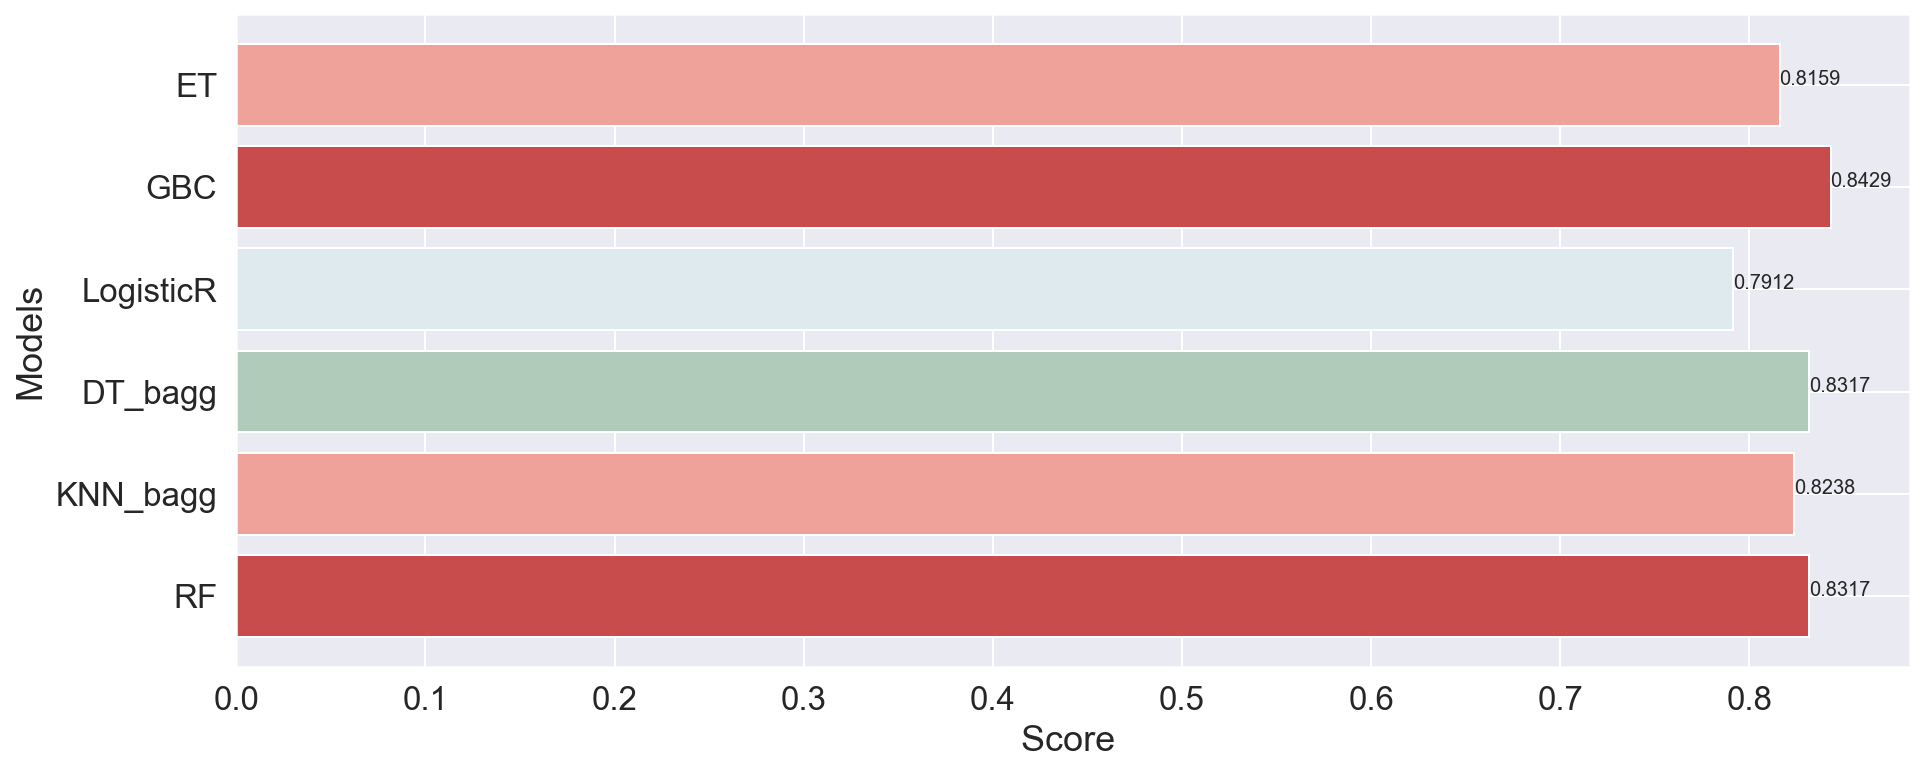

In [116]:
fig = plt.figure(figsize = (15, 6)) 

# Plot the horizontal bar plot for models by score
plt.barh(df['Models'],df['Score'],color = ['#c94c4c','#eea29a','#b1cbbb','#deeaee']) 

# Set Labels
plt.xlabel("Score ") 
plt.ylabel("Models") 

for index, value in enumerate(df['Score'].round(4)):
    # Add the label of score in each bar
    plt.text(value, index,str(value))

plt.show() 

- According to the plot, we can see GradiantBoosting and ExtraTree have best scores, but on Extra Tree no matter much we run with best parameters there is a huge difference when we do Cross Validation Score.  
- Gradiant Boosting Classifier had the best score even with Cross Validation Score, Therefore we will be using it to do the prediction.

### Save prediction of best model

In [142]:
pred = pd.DataFrame(gbc_cv.predict(X_test),columns=['Survived'])
pred.set_index(test['PassengerId'],inplace=True)

In [143]:
pred.to_csv('../data-titanic/prediction.csv')

## Conclusions and Recommendations
---

After applying  basic concepts of Machine Learning algorithms and data processing to predict the survival passengers,  We used 6 different ML models and the **Best** machine learning model among others that gave highest score on Kaggle competition was Gradiant Boosting Classifier with  **0.77033 of accuracy score** . The recommendations are the safety equipments should be around the ship and available, and the emergency plan is required for each ticket class.

### Titanic predictioin score on kaggle

All predictions are saved in `prediction.csv` file.

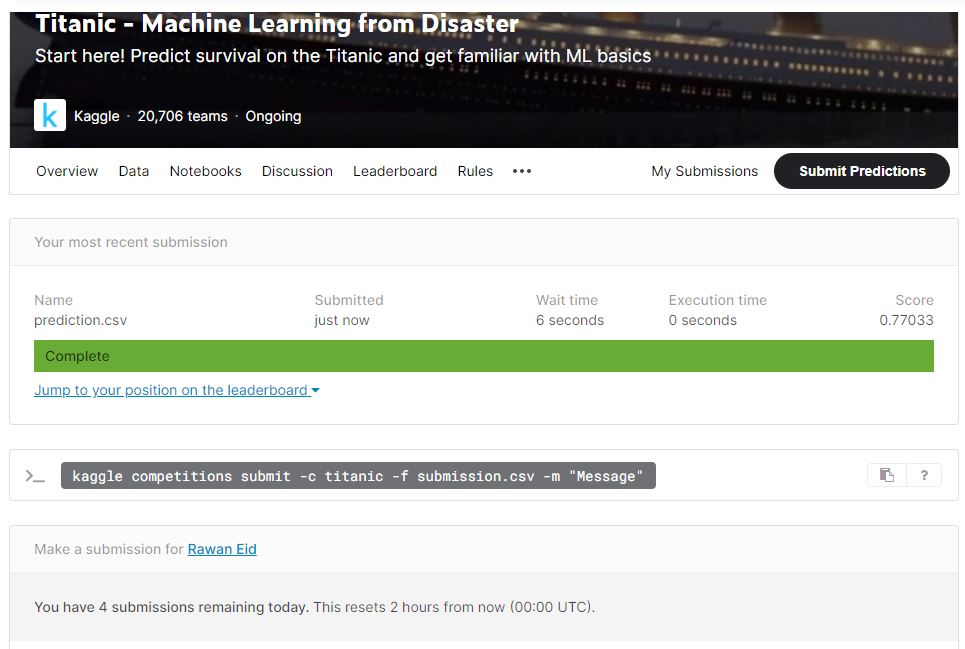

In [144]:
from IPython.display import Image
Image("../gradiantboosting.JPG")

## To see the prediction score on Kaggle



- [Titanic Score](https://www.kaggle.com/rawaneid/titanic-notebook)

The notebook in Kaggle <a href="https://www.kaggle.com/mo7mmedcs/titanic-survival-prediction">Click Here</a>